# Determining what type of television content Microsoft should focus on creating

# Objectives
Try to find answers to following questions:
* What should be our metric for success? ratings? popularity? both?
* Are there certain genres to focus on?
* What networks should we look to emulate?
* Should we look to adapt other works or produce completely original work?

**Let's dive in and look at the data we have.**

In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import ast
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load dataframe
df = pd.read_csv('top_television_data.csv', index_col=0)

In [3]:
# Take a peek
df

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,rt_audience_rating,genres,tv_rating,release_year,runtime_mins,imdb_url
0,La Casa de Papel,Netflix,8.5,215007,91.0,82.0,"['action', 'crime', 'mystery', 'thriller']",TV-MA,2017.0,70.0,https://www.imdb.com/title/tt6468322/
1,Ozark,Netflix,8.4,136710,81.0,91.0,"['crime', 'drama', 'thriller']",TV-MA,2017.0,60.0,https://www.imdb.com/title/tt5071412/
2,Tiger King,Netflix,7.8,33700,86.0,86.0,"['documentary', 'crime']",TV-MA,2020.0,31.0,https://www.imdb.com/title/tt11823076/
3,Westworld,HBO,8.7,388252,85.0,80.0,"['drama', 'mystery', 'sci-fi', 'western']",TV-MA,2016.0,62.0,https://www.imdb.com/title/tt0475784/
4,The Walking Dead,AMC,8.2,821809,81.0,78.0,"['drama', 'horror', 'thriller']",TV-MA,2010.0,44.0,https://www.imdb.com/title/tt1520211/
...,...,...,...,...,...,...,...,...,...,...,...
242,X-Men: The Animated Series,FOX,8.4,36051,85.0,97.0,"['animation', 'action', 'family', 'sci-fi', 't...",TV-Y7,1992.0,23.0,https://www.imdb.com/title/tt0103584/
243,Futurama,Comedy Central,8.4,205817,95.0,96.0,"['animation', 'comedy', 'sci-fi']",TV-14,1999.0,22.0,https://www.imdb.com/title/tt0149460/
244,Ezel,Netflix,8.4,23671,100.0,NaN,"['crime', 'drama', 'thriller']",TV-14,2009.0,90.0,https://www.imdb.com/title/tt1534360/
245,American Crime Story,FX,8.4,74208,93.0,94.0,"['biography', 'crime', 'drama']",TV-MA,2016.0,42.0,https://www.imdb.com/title/tt2788432/


Looks like we have some floats where we could have integers, and we need to count genres, rather than work with lists, or in this case strings of lists.

In [4]:
df.iloc[1]['genres']

"['crime', 'drama', 'thriller']"

In [5]:
# Check for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               247 non-null    object 
 1   network             247 non-null    object 
 2   imdb_rating         247 non-null    float64
 3   num_imdb_ratings    247 non-null    int64  
 4   rt_critic_rating    247 non-null    float64
 5   rt_audience_rating  194 non-null    float64
 6   genres              247 non-null    object 
 7   tv_rating           247 non-null    object 
 8   release_year        247 non-null    float64
 9   runtime_mins        247 non-null    float64
 10  imdb_url            247 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 23.2+ KB


In [6]:
# Drop column with null values, knowing we can grab it later if necessary
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    float64
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    float64
 8   runtime_mins      247 non-null    float64
 9   imdb_url          247 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 21.2+ KB


In [7]:
# Change dtypes for columns we want in int64
df[['rt_critic_rating', 'release_year', 'runtime_mins']] = df[
                                                ['rt_critic_rating', 'release_year', 'runtime_mins']
                                                ].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    int64  
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    int64  
 8   runtime_mins      247 non-null    int64  
 9   imdb_url          247 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.2+ KB


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# De-stringify the genres list scraped from IMDB
df['genres'] = df.genres.apply(lambda x: ast.literal_eval(x))
df.iloc[1]['genres']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['crime', 'drama', 'thriller']

In [9]:
# Turn the genres column into a series that we can stack and
# make a dataframe of dummy genre colums to get a count of each genre
df_genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
df_genres

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
243,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
244,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
245,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Merge our dummies dataframe onto the original dataframe
df = pd.concat([df, df_genres], axis=1)
# Take a peek
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
4,The Walking Dead,AMC,8.2,821809,81,"[drama, horror, thriller]",TV-MA,2010,44,https://www.imdb.com/title/tt1520211/,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Remove outliers for the numerical data we'll be focusing on

# Calculate the z-scores of the numerical data
z_scores = stats.zscore(df[['imdb_rating', 'num_imdb_ratings', 'rt_critic_rating']])
# Turn those scores into all positive values, so we can easily separate
abs_z_scores = np.abs(z_scores)
# Filter out outliers (more than 3 standard deviations from the mean)
filtered_entries = (abs_z_scores < 3).all(axis=1)
# Update the dataframe
df = df[filtered_entries]

In [12]:
# See that 12 rows were eliminated
df.shape

(235, 36)

In [13]:
# Save a copy for good measure :P
df.to_csv('top_television_data_updated.csv')

In [14]:
# Set up a parameter to include only contemporary shows (released in the last decade). Sneakily save a copy for good measure :P
df_contemp = df[df['release_year'] >= 2010]
df_contemp.to_csv('top_contemporary_television_2010.csv')
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'RT Rating & IMDB Rating')

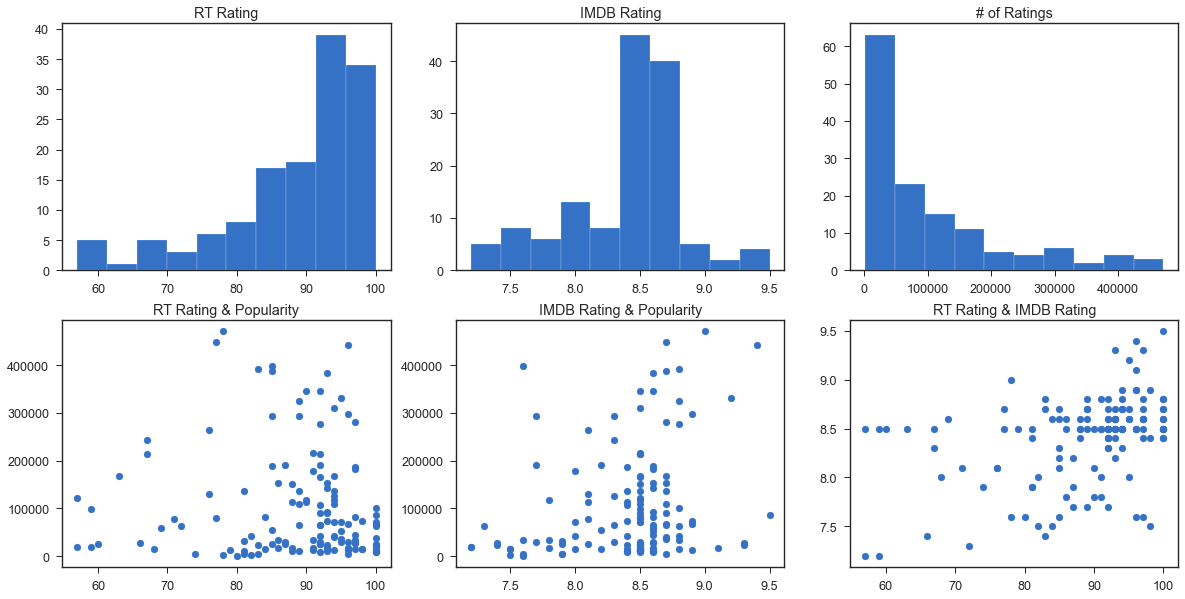

In [67]:
# quick look at the distributions for our possible metrics of success and for any correlations
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axs[0,0].hist(df_contemp['rt_critic_rating'])
axs[0,1].hist(df_contemp['imdb_rating'])
axs[0,2].hist(df_contemp['num_imdb_ratings'])

axs[0,0].set_title('RT Rating')
axs[0,1].set_title('IMDB Rating')
axs[0,2].set_title('# of Ratings')

axs[1,0].scatter(df_contemp['rt_critic_rating'], df_contemp['num_imdb_ratings'])
axs[1,1].scatter(df_contemp['imdb_rating'], df_contemp['num_imdb_ratings'])
axs[1,2].scatter(df_contemp['rt_critic_rating'], df_contemp['imdb_rating'])

axs[1,0].set_title('RT Rating & Popularity')
axs[1,1].set_title('IMDB Rating & Popularity')
axs[1,2].set_title('RT Rating & IMDB Rating')

The scatterplots go in order of least correlation to most correlation, but surprisingly there isn't a strong relationship between rating and popularity.

Our metric of success is still unclear. Let's see if grouping by genres gives us any more insight.

In [15]:
# Get a list of column names, so we can create a dataframe with just the genre data from the contemporary dataframe
df_contemp.columns

Index(['title', 'network', 'imdb_rating', 'num_imdb_ratings',
       'rt_critic_rating', 'genres', 'tv_rating', 'release_year',
       'runtime_mins', 'imdb_url', 'action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'game-show', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western'],
      dtype='object')

In [16]:
# Create dataframe of contemporary genre data
genres_contemp = df_contemp[
    ['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary',
     'drama', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 
     'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
     'thriller', 'war', 'western']
    ]
genres_contemp.head()

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Look at sums of shows within each genre
genres_contemp.sum()

action         31
adventure      21
animation      15
biography       6
comedy         35
crime          47
documentary    14
drama          97
family          4
fantasy        20
game-show       0
history        10
horror         11
music           2
musical         1
mystery        32
news            1
reality-tv      2
romance        10
sci-fi         27
short           1
sport           3
talk-show       3
thriller       42
war             3
western         2
dtype: int64

In [18]:
# 136 shows over 26 genres (shows can have more than 1 genre)
genres_contemp.shape

(136, 26)

In [19]:
# Eliminate genres with small samples
genres_contemp = genres_contemp[genres_contemp.columns[genres_contemp.sum() >= 10]]

In [20]:
# still all 136 shows, now over the 14 most common genres
genres_contemp.shape

(136, 14)

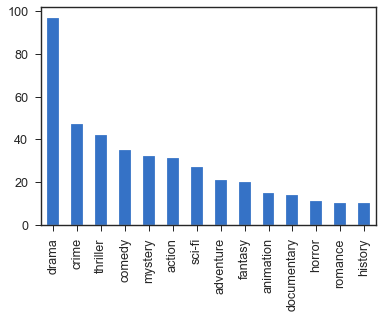

In [21]:
# quick look at spread of most common genres
sns.set_style("ticks")
genres_contemp.sum().sort_values(ascending=False).plot.bar()

In [22]:
# Set up some variables to show the average ratings and popularity by genre
# Do this by multiplying the ratings and # of ratings by the dummy values in the genre columns
genres_contemp_imdb_rating = genres_contemp.apply(lambda x: x*df_contemp['imdb_rating'])
genres_contemp_rt_rating = genres_contemp.apply(lambda x: x*df_contemp['rt_critic_rating'])
genres_contemp_popularity = genres_contemp.apply(lambda x: x*df_contemp['num_imdb_ratings'])

In [23]:
# Capture the average of each parameter per genre
genre_imdb_avg = genres_contemp_imdb_rating.sum()/genres_contemp.sum()
genre_rt_avg = genres_contemp_rt_rating.sum()/genres_contemp.sum()
genre_pop_avg = genres_contemp_popularity.sum()/genres_contemp.sum()

Let's take a look at some descriptive stats to see what this is telling us about averages across genres.

In [34]:
# Create a small dataframe using just the data we need and look at the descriptive stats
df_avg_compare = pd.concat([genre_rt_avg, genre_imdb_avg, genre_pop_avg], axis=1)
df_avg_compare.columns = ['rt_avg', 'imdb_avg', 'pop_avg']
df_avg_compare.describe()

,rt_avg,imdb_avg,pop_avg
count,14.000000,14.000000,14.000000
mean,88.883180,8.444772,111640.054086
std,2.681519,0.164671,35749.255485
min,85.454545,8.237500,28096.714286
25%,87.008730,8.336033,86870.464773
50%,88.269048,8.381746,123630.885470
75%,89.897222,8.514643,135411.110942
max,95.200000,8.771429,158686.600000


There is not much this is showing us, other than the "popularity" averages appear most interesting to look at.

IMDB ratings appear to be fairly similar, so let's look at Rotten Tomatoes ratings, most people's first stop to gauge how good a show is.

In [98]:
# Sort by one the popularity variable, so we can hopefully see if the average rating has a similar or opposite trend
df_avg_compare = df_avg_compare.sort_values('pop_avg')

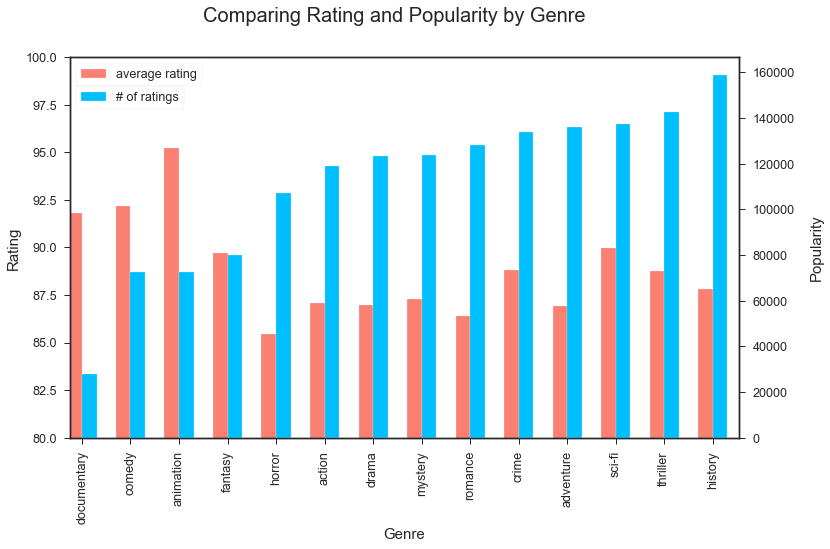

In [107]:
# Take a look at the relationship between popularity and ratings
sns.set_style("ticks")
fig = plt.figure(figsize=(12,7))
plt.suptitle('Comparing Rating and Popularity by Genre', fontsize = 20)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

df_avg_compare.rt_avg.plot(kind='bar', color='salmon', ax=ax, width=0.3, position=1, label='average rating')
df_avg_compare.pop_avg.plot(kind='bar', color='deepskyblue', ax=ax2, width=0.3, position=0, label='# of ratings')

ax.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, .94))
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylim(80,100)
ax.set_ylabel('Rating', fontsize=15)
ax2.set_ylabel('Popularity', fontsize=15, labelpad=15.0)
plt.show()

In [52]:
# see if the correlation matches what the visualization appears to shoow
genre_pop_avg.corr(genre_rt_avg)

-0.6446794882910207

Ratings have a negative correlation to our metric of popularity. A highly rated show is often not the most popular.

Since we're trying to find what programming will generate revenue and excitement for Microsoft, our metric of success should be measured by the popularity, which in this case is the number of ratings on IMDB.

Next, let's see if we can figure out which networks offer the most popular programming.

In [72]:
# Hmm, some network values need cleaning up.
df_contemp['network'].value_counts()

Netflix                                                 34
HBO                                                     13
NBC                                                      8
FX                                                       7
Hulu                                                     6
CW                                                       5
Amazon Prime Video                                       4
Cartoon Network                                          4
PBS                                                      3
ABC                                                      3
Amazon                                                   3
USA                                                      3
Starz                                                    3
CBS                                                      2
Crunchyroll                                              2
Showtime                                                 2
BBC America                                             

In [73]:
# Clean up with np.select! 
conditions = [
    (df_contemp['network'].str.find('BBC') >= 0),
    (df_contemp['network'].str.find('Amazon') >= 0),
    (df_contemp['network'].str.find('Hulu') >= 0),
    (df_contemp['network'].str.find('NBC') >= 0),
    (df_contemp['network'].str.find('Acorn') >= 0),
    (df_contemp['network'].str.find('Cartoon Network') >= 0),
    (df_contemp['network'].str.find('Netflix') >= 0),
    (df_contemp['network'].str.find('Disney') >= 0)
]

choices = [
    'BBC',
    'Amazon',
    'Hulu',
    'NBC',
    'Acorn',
    'Cartoon Network',
    'Netflix',
    'Disney'
]

df_contemp['network'] = np.select(conditions, choices, default=df_contemp['network'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
# Take a peek at our cleaner data
df_contemp['network'].value_counts()

Netflix            35
HBO                13
NBC                 9
Amazon              8
Hulu                7
FX                  7
Cartoon Network     6
BBC                 6
CW                  5
Starz               3
USA                 3
PBS                 3
ABC                 3
CBS                 2
Disney              2
Acorn               2
Showtime            2
Crunchyroll         2
ZDF                 1
Comedy Central      1
Apple TV+           1
SyFy                1
louisck.net         1
History             1
AMC                 1
YouTube Premium     1
POP                 1
Channel 5           1
TruTV               1
SVT                 1
WEB TV US           1
AT-X                1
Cinemax             1
NGC                 1
Aniplex             1
Science             1
Name: network, dtype: int64

In [75]:
# Let's focus on networks with 5 or more popular shows
top_networks = ['Netflix', 'HBO', 'NBC', 'Amazon', 'Hulu', 'FX', 'BBC', 'Cartoon Network', 'CW']
top_networks_contemp = df_contemp[df_contemp['network'].isin(top_networks)]

In [76]:
# Add up the number of IMDB ratings per network, as well as the number of shows per network
pop_per_network = top_networks_contemp.groupby('network')['num_imdb_ratings'].sum()
shows_per_network = top_networks_contemp['network'].value_counts()

Let's look to see who has generated the highest total ratings.

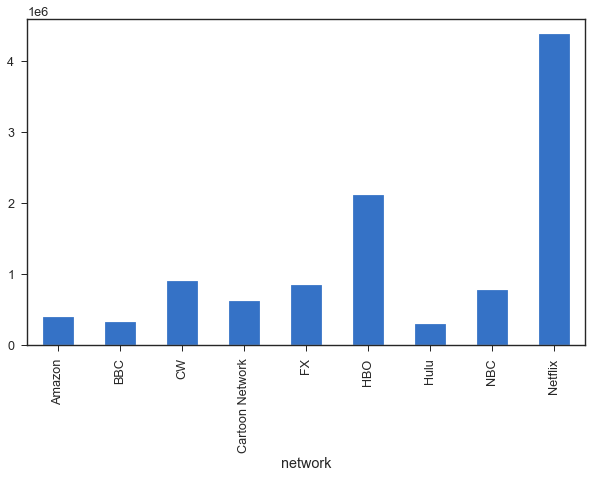

In [77]:
sns.set_style("ticks")
pop_per_network.plot.bar(figsize=(10,6))

No surprise that it's Netflix, given the fact that they have so many more shows that have made the cut.

But what about on average?

In [79]:
# Divide number of ratings by number of shows to get an average
network_pop_avg = pop_per_network/shows_per_network
network_pop_avg

Amazon              49572.500000
BBC                 52983.500000
CW                 180467.800000
Cartoon Network    102299.000000
FX                 121341.142857
HBO                162752.384615
Hulu                42499.714286
NBC                 86102.555556
Netflix            125023.228571
dtype: float64

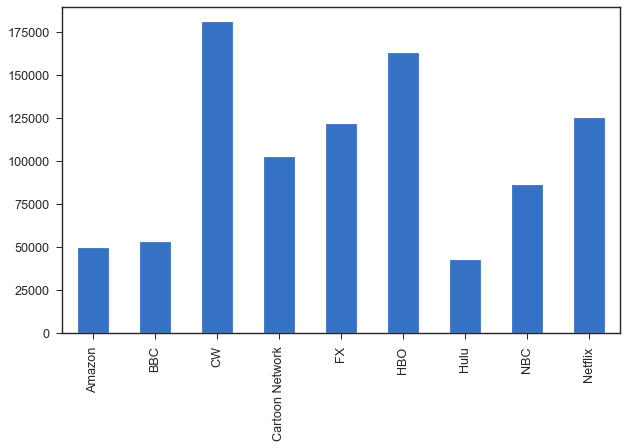

In [80]:
# Plot out an average
sns.set_style("ticks")
network_pop_avg.plot.bar(figsize=(10,6))

Netflix is barely hanging on in third! Look at how good CW, HBO, FX, and Cartoon Network look. Some alternatives to consider when looking at who to emulate.

Now let's see whether there are any noticeable differences in popularity between adaptations and original programming.

In [81]:
# Painstaking research regarding the originality of each programming
# (0 = based on source material [including documentaries, spin-offs, etc.]
#  1 = not based on source material)
df_contemp['original'] = [
 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
 1, 0, 1, 1, 0, 1 ]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [82]:
# Create a dataframe for both adaptations and original shows
df_contemp_adapt = df_contemp[df_contemp['original'] == 0]
df_contemp_orig = df_contemp[df_contemp['original'] == 1]

Text(0.5, 1.0, 'Ratings for Adapted & Original Content')

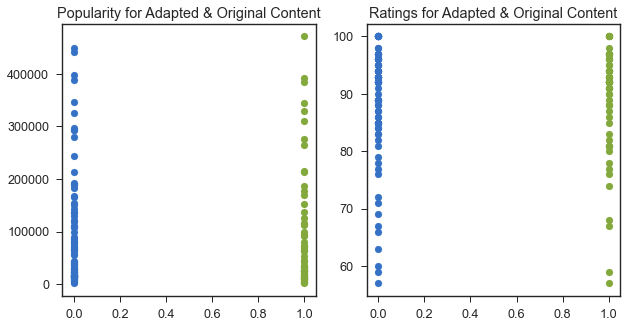

In [94]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].scatter(df_contemp_adapt['original'], df_contemp_adapt['num_imdb_ratings'])
axs[0].scatter(df_contemp_orig['original'], df_contemp_orig['num_imdb_ratings'])
axs[0].set_title('Popularity for Adapted & Original Content')

axs[1].scatter(df_contemp_adapt['original'], df_contemp_adapt['rt_critic_rating'])
axs[1].scatter(df_contemp_orig['original'], df_contemp_orig['rt_critic_rating'])
axs[1].set_title('Ratings for Adapted & Original Content')

Very similar results it would seem. Let's see if averaging out these metrics does us any good.

(85.0, 90.0)

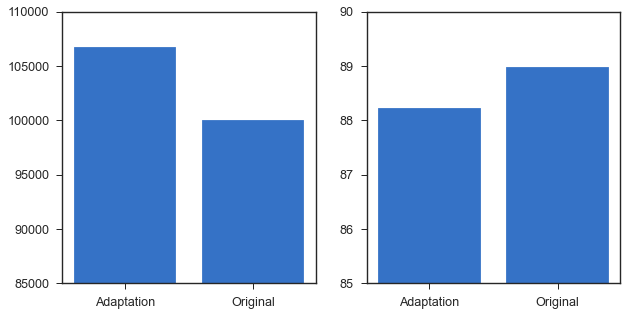

In [99]:
adapt_avg = df_contemp_adapt['num_imdb_ratings'].sum()/len(df_contemp_adapt)
orig_avg = df_contemp_orig['num_imdb_ratings'].sum()/len(df_contemp_orig)

adapt_rt_avg = df_contemp_adapt['rt_critic_rating'].sum()/len(df_contemp_adapt)
orig_rt_avg = df_contemp_orig['rt_critic_rating'].sum()/len(df_contemp_orig)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].bar(['Adaptation', 'Original'], [adapt_avg, orig_avg])
axs[0].set_ylim(85000,110000)

axs[1].bar(['Adaptation', 'Original'], [adapt_rt_avg, orig_rt_avg])
axs[1].set_ylim(85, 90)

Again, opposite stories, but based on the metric we have chosen, adaptations seem to hold a slight advantage in terms of creating more popular content.